<a href="https://colab.research.google.com/github/NaydelinAidee/Simulaci-nI/blob/main/inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

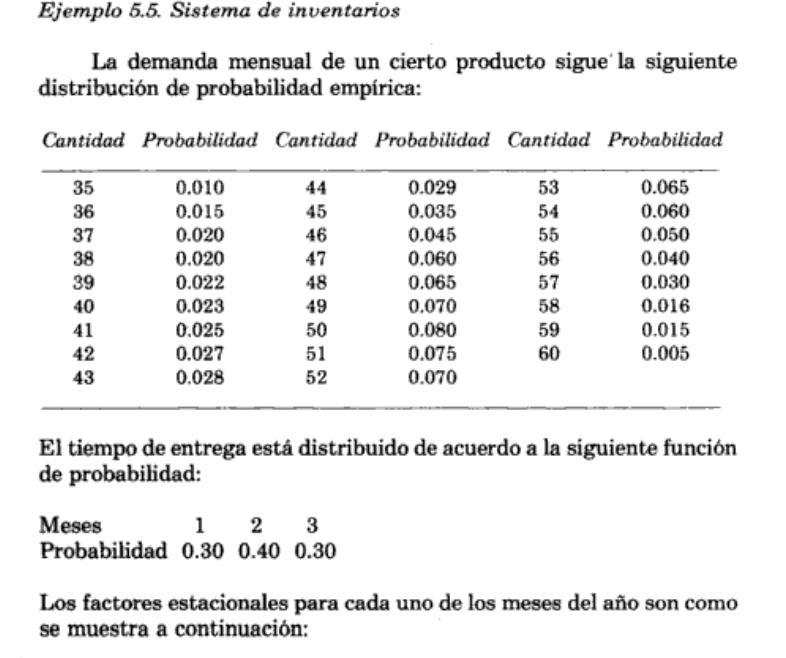

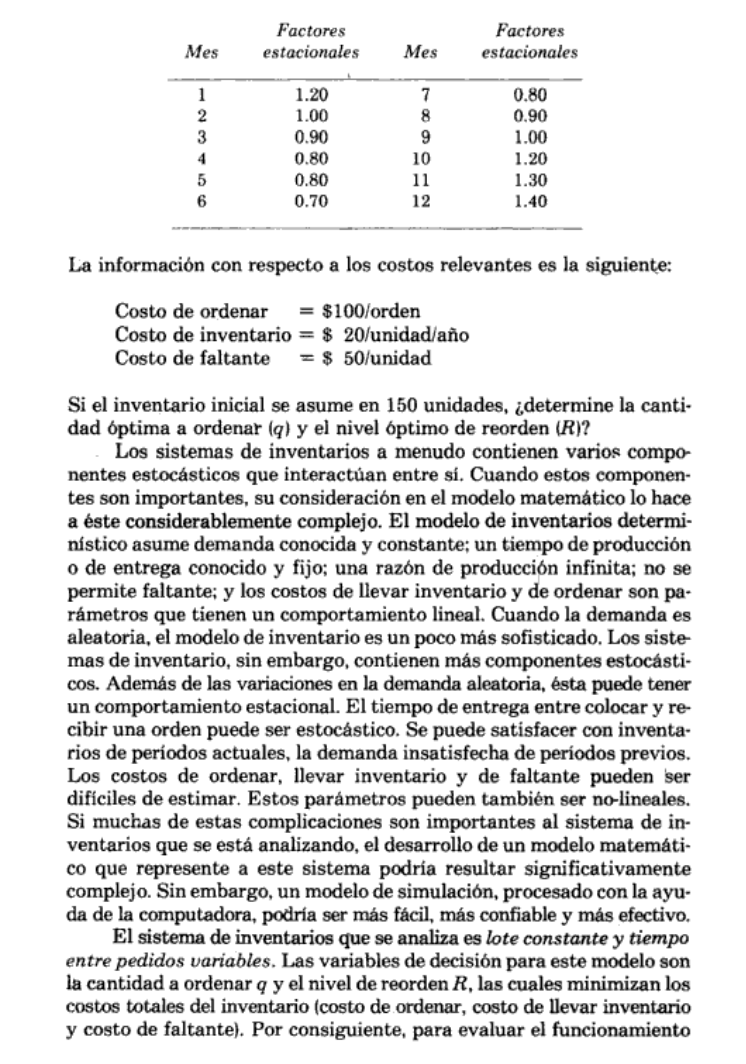

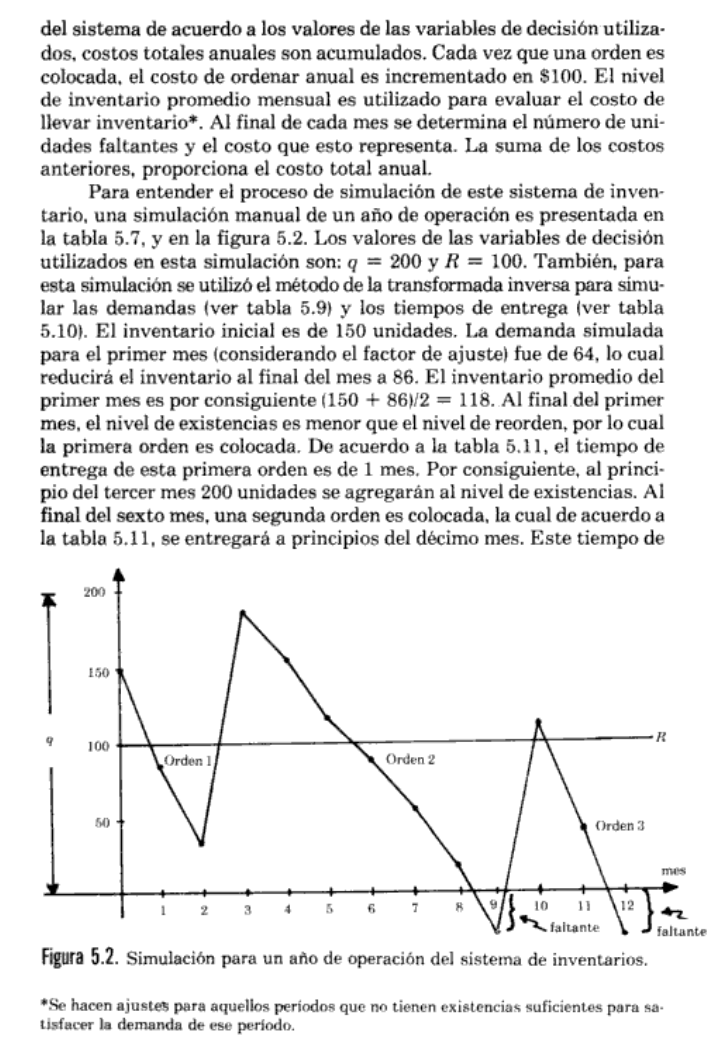

Dado este problema ahora nosotros implementaremos un codigo que nos ayude a simularlo computacionalmente.

PRIMERO  

definimos la distribucion acumulada de nuestra demanda mensual,esto lo hacemos mediante un arreglo.

In [6]:
import numpy as np
from random import random
# Distribución acumulada de la demanda mensual (dadm)
dadm_demanda = np.array([
    0.01, 0.025, 0.045, 0.065, 0.087, 0.11, 0.135, 0.162,
    0.19, 0.219, 0.254, 0.299, 0.359, 0.424, 0.494, 0.574,
    0.649, 0.719, 0.784, 0.844, 0.894, 0.934, 0.964, 0.98, 0.995, 1.0
])

Ahora hacemos mencion de cuales son nuestros valores posibles para nuestra demanda,asi como los factores estacionario que son de enero a diciembre,y la duracion de nuestra simulacion que serian los dos años que son 24 meses.

In [7]:
cantidades_demanda = np.arange(35, 61)  # Valores posibles de demanda

# Factores estacionales (enero a diciembre)
factores_estacionales = np.array([1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4])

# Duración de la simulación
meses_a_simular = 24  # 2 años

Ahora veamos nuestros costos por cada orden,por unidad de inventario por un mes y por unidad no surtida.

In [ ]:
#costos
costo_ordenar = 100                  # Costo por cada orden realizada
costo_inventario_mensual = 20 / 12  # Costo por unidad en inventario por mes
costo_faltante = 50                 # Costo por unidad no surtida

Esta función convierte un número aleatorio u (entre 0 y 1) en una cantidad de demanda, usando una distribución acumulada

In [9]:
def generar_demanda(u):
    for i, prob in enumerate(dadm_demanda):
        if u <= prob:
            return cantidades_demanda[i]

Esta función toma como entrada un número aleatorio u entre 0 y 1,, y devuelve un tiempo de entrega en meses, basado en una distribución de probabilidad discreta.

In [11]:
# Función para generar un tiempo de entrega según una distribución discreta
def generar_tiempo_entrega(u):
    if u < 0.3:
        return 1
    elif u < 0.7:
        return 2
    else:
        return 3

 simulamos el comportamiento de un sistema de inventario durante varios meses y calculamos el costo anual total promedio,ademas calculamos la demanda dependiendo de la estacionalidad.


Despues evaluamos el inventario contra la demanda y hacemos condicionales para cada caso.

retornamos muestro costo

In [ ]:
def simular_costos_totales(nivel_reorden, cantidad_ordenar):
    inventario = 150
    pedidos_pendientes = []
    costo_total = 0

    for mes in range(meses_a_simular):
        # Verificar llegada de pedidos
        for fecha_entrega in pedidos_pendientes[:]:
            if fecha_entrega == mes:
                inventario += cantidad_ordenar
                pedidos_pendientes.remove(fecha_entrega)

        # Calcular demanda ajustada por estacionalidad
        demanda = generar_demanda(random()) * factores_estacionales[mes % 12]

        # Evaluar inventario vs demanda
        if demanda <= inventario:
            inventario -= demanda
            faltantes = 0
        else:
            faltantes = demanda - inventario
            inventario = 0

        if inventario <= nivel_reorden:
            tiempo_entrega = generar_tiempo_entrega(random())
            pedidos_pendientes.append(mes + tiempo_entrega)
            costo_total += costo_ordenar

        # Costos mensuales acumulados
        costo_total += inventario * costo_inventario_mensual
        costo_total += faltantes * costo_faltante

    # Convertir a costo anual promedio
    return costo_total * 12 / meses_a_simular


Ahora vemaos como hallar nuestros parametros optimos

Buscamos  el mejor par de parámetros (R, Q) que minimiza el costo total anual promedio simulando muchas veces cada par.

In [25]:
def encontrar_parametros_optimos():
    resultados = []
    for r in range(35, 200):
        for q in range(35, 200):
            costos_promedio = np.mean([simular_costos_totales(r, q) for _ in range(20)])
            resultados.append((costos_promedio, r, q))
    return min(resultados)


Ahora podemos ver el codigo completo:

In [24]:
import numpy as np
from random import random

# Distribución acumulada de la demanda mensual (dadm)
dadm_demanda = np.array([
    0.01, 0.025, 0.045, 0.065, 0.087, 0.11, 0.135, 0.162,
    0.19, 0.219, 0.254, 0.299, 0.359, 0.424, 0.494, 0.574,
    0.649, 0.719, 0.784, 0.844, 0.894, 0.934, 0.964, 0.98, 0.995, 1.0
])
cantidades_demanda = np.arange(35, 61)  # Valores posibles de demanda

# Factores estacionales (enero a diciembre)
factores_estacionales = np.array([1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4])

# Duración de la simulación
meses_a_simular = 24  # 2 años

#costos
costo_ordenar = 100                  # Costo por cada orden realizada
costo_inventario_mensual = 20 / 12  # Costo por unidad en inventario por mes
costo_faltante = 50                 # Costo por unidad no surtida


# Función para generar una cantidad de demanda con base en damd
def generar_demanda(u):
    for i, prob in enumerate(dadm_demanda):
        if u <= prob:
            return cantidades_demanda[i]

# Función para generar un tiempo de entrega según una distribución discreta
def generar_tiempo_entrega(u):
    if u < 0.3:
        return 1
    elif u < 0.7:
        return 2
    else:
        return 3


def simular_costos_totales(nivel_reorden, cantidad_ordenar):
    inventario = 150
    pedidos_pendientes = []
    costo_total = 0

    for mes in range(meses_a_simular):
        # Verificar llegada de pedidos
        for fecha_entrega in pedidos_pendientes[:]:
            if fecha_entrega == mes:
                inventario += cantidad_ordenar
                pedidos_pendientes.remove(fecha_entrega)

        # Calcular demanda ajustada por estacionalidad
        demanda = generar_demanda(random()) * factores_estacionales[mes % 12]

        # Evaluar inventario vs demanda
        if demanda <= inventario:
            inventario -= demanda
            faltantes = 0
        else:
            faltantes = demanda - inventario
            inventario = 0

        if inventario <= nivel_reorden:
            tiempo_entrega = generar_tiempo_entrega(random())
            pedidos_pendientes.append(mes + tiempo_entrega)
            costo_total += costo_ordenar

        # Costos mensuales acumulados
        costo_total += inventario * costo_inventario_mensual
        costo_total += faltantes * costo_faltante

    # Convertir a costo anual promedio
    return costo_total * 12 / meses_a_simular


def encontrar_parametros_optimos():
    resultados = []
    for r in range(35, 200):
        for q in range(35, 200):
            costos_promedio = np.mean([simular_costos_totales(r, q) for _ in range(20)])
            resultados.append((costos_promedio, r, q))
    return min(resultados)


if __name__ == "__main__":
    costo_minimo, nivel_reorden_optimo, cantidad_ordenar_optima = encontrar_parametros_optimos()

    print("\n--- RESULTADOS DE LA SIMULACIÓN ---")
    print(f"✔ Nivel óptimo de reorden (R): {nivel_reorden_optimo}")
    print(f"✔ Cantidad óptima a ordenar (Q): {cantidad_ordenar_optima}")
    print(f"💰 Costo anual promedio estimado: ${costo_minimo:.2f}")


--- RESULTADOS DE LA SIMULACIÓN ---
✔ Nivel óptimo de reorden (R): 190
✔ Cantidad óptima a ordenar (Q): 48
💰 Costo anual promedio estimado: $2780.43
